In [1]:
import math
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sn
from random import randint
%matplotlib inline

from fim import apriori

df = pd.read_csv(r'C:\Users\Mario\Desktop\UniPi\1° semestre\Data Mining 1\Datasets\DatasetProject1\dfpattern.csv')

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,WorkLifeBalance,MonthlyIncome,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole
0,Age:18-32,Attr:Yes,Travel_frequently,Sales,10-30 miles,College,Medical,Hourly:58-72,EnvSatisf:Low,Male,...,Hike:11-18(%),WLBalance:Good,Monthly:3000-5000,Training:0-2,Companies:3-6,Divorced,Performance:Excellent,TotWork:5-15,AtCompany:0-2,CurrRole:0-6
1,Age:18-32,Attr:Yes,Travel_rarely,Sales,10-30 miles,Master,Marketing,Hourly:58-72,EnvSatisf:Low,Male,...,Hike:11-18(%),WLBalance:Better,Monthly:5000-8000,Training:0-2,Companies:0-3,Married,Performance:Outstanding,TotWork:5-15,AtCompany:6-29,CurrRole:0-6
2,Age:39-60,Attr:No,Non_travel,Research & Development,0-4 miles,Master,Technical Degree,Hourly:58-72,EnvSatisf:Very High,Male,...,Hike:11-18(%),WLBalance:Good,Monthly:5000-8000,Training:0-2,Companies:0-3,Divorced,Performance:Outstanding,TotWork:5-15,AtCompany:6-29,CurrRole:0-6
3,Age:39-60,Attr:Yes,Travel_rarely,Human Resources,10-30 miles,Doctor,Human Resources,Hourly:86-100,EnvSatisf:Very High,Male,...,Hike:11-18(%),WLBalance:Better,Monthly:5000-8000,Training:2-4,Companies:0-3,Married,Performance:Excellent,TotWork:1-5,AtCompany:0-2,CurrRole:0-6
4,Age:39-60,Attr:No,Travel_rarely,Research & Development,0-4 miles,Bachelor,Life Sciences,Hourly:72-86,EnvSatisf:Very High,Male,...,Hike:18-25(%),WLBalance:Better,Monthly:1000-3000,Training:4-6,Companies:0-3,Married,Performance:Outstanding,TotWork:5-15,AtCompany:2-6,CurrRole:0-6


In [2]:
to_drop = ["BusinessTravel", "EducationField", 
           "PercentSalaryHike", "WorkLifeBalance", "TrainingTimesLastYear", 
           "NumCompaniesWorked", "PerformanceRating", 
           "YearsInCurrentRole"]

dfpattern = df.drop(columns=to_drop, axis=1, inplace=False)

dfpattern.head()

,Age,Attrition,Department,DistanceFromHome,Education,HourlyRate,EnvironmentSatisfaction,Gender,JobSatisfaction,OverTime,MonthlyIncome,MaritalStatus,TotalWorkingYears,YearsAtCompany
0,Age:18-32,Attr:Yes,Sales,10-30 miles,College,Hourly:58-72,EnvSatisf:Low,Male,JobSatisf:Very High,OverTime:Yes,Monthly:3000-5000,Divorced,TotWork:5-15,AtCompany:0-2
1,Age:18-32,Attr:Yes,Sales,10-30 miles,Master,Hourly:58-72,EnvSatisf:Low,Male,JobSatisf:High,OverTime:No,Monthly:5000-8000,Married,TotWork:5-15,AtCompany:6-29
2,Age:39-60,Attr:No,Research & Development,0-4 miles,Master,Hourly:58-72,EnvSatisf:Very High,Male,JobSatisf:Very High,OverTime:No,Monthly:5000-8000,Divorced,TotWork:5-15,AtCompany:6-29
3,Age:39-60,Attr:Yes,Human Resources,10-30 miles,Doctor,Hourly:86-100,EnvSatisf:Very High,Male,JobSatisf:Low,OverTime:No,Monthly:5000-8000,Married,TotWork:1-5,AtCompany:0-2
4,Age:39-60,Attr:No,Research & Development,0-4 miles,Bachelor,Hourly:72-86,EnvSatisf:Very High,Male,JobSatisf:Very High,OverTime:No,Monthly:1000-3000,Married,TotWork:5-15,AtCompany:2-6


In [3]:
dfpattern.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'HourlyRate', 'EnvironmentSatisfaction', 'Gender', 'JobSatisfaction',
       'OverTime', 'MonthlyIncome', 'MaritalStatus', 'TotalWorkingYears',
       'YearsAtCompany'],
      dtype='object')

In [4]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [5]:
baskets = dfpattern.values.tolist()
baskets

[['Age:18-32',
  'Attr:Yes',
  'Sales',
  '10-30 miles',
  'College',
  'Hourly:58-72',
  'EnvSatisf:Low',
  'Male',
  'JobSatisf:Very High',
  'OverTime:Yes',
  'Monthly:3000-5000',
  'Divorced',
  'TotWork:5-15',
  'AtCompany:0-2'],
 ['Age:18-32',
  'Attr:Yes',
  'Sales',
  '10-30 miles',
  'Master',
  'Hourly:58-72',
  'EnvSatisf:Low',
  'Male',
  'JobSatisf:High',
  'OverTime:No',
  'Monthly:5000-8000',
  'Married',
  'TotWork:5-15',
  'AtCompany:6-29'],
 ['Age:39-60',
  'Attr:No',
  'Research & Development',
  '0-4 miles',
  'Master',
  'Hourly:58-72',
  'EnvSatisf:Very High',
  'Male',
  'JobSatisf:Very High',
  'OverTime:No',
  'Monthly:5000-8000',
  'Divorced',
  'TotWork:5-15',
  'AtCompany:6-29'],
 ['Age:39-60',
  'Attr:Yes',
  'Human Resources',
  '10-30 miles',
  'Doctor',
  'Hourly:86-100',
  'EnvSatisf:Very High',
  'Male',
  'JobSatisf:Low',
  'OverTime:No',
  'Monthly:5000-8000',
  'Married',
  'TotWork:1-5',
  'AtCompany:0-2'],
 ['Age:39-60',
  'Attr:No',
  'Research &

In [6]:
#Frequent itemsets
supp = [20, 10, 5, 4, 3, 2, 0.9, 0.8]
target = ["a", "c", "m"]

for s in supp:
    for t in target:
        itemsets = apriori(baskets, target=t, supp=s, report="s")
        print("Support:", s, "Target:",t)
        print("Frequent itemsets:", len(itemsets))
        print()

Support: 20 Target: a
Frequent itemsets: 151

Support: 20 Target: c
Frequent itemsets: 151

Support: 20 Target: m
Frequent itemsets: 72

Support: 10 Target: a
Frequent itemsets: 854

Support: 10 Target: c
Frequent itemsets: 854

Support: 10 Target: m
Frequent itemsets: 339

Support: 5 Target: a
Frequent itemsets: 4355

Support: 5 Target: c
Frequent itemsets: 4355

Support: 5 Target: m
Frequent itemsets: 1614

Support: 4 Target: a
Frequent itemsets: 6772

Support: 4 Target: c
Frequent itemsets: 6769

Support: 4 Target: m
Frequent itemsets: 2393

Support: 3 Target: a
Frequent itemsets: 12349

Support: 3 Target: c
Frequent itemsets: 12328

Support: 3 Target: m
Frequent itemsets: 4241

Support: 2 Target: a
Frequent itemsets: 26460

Support: 2 Target: c
Frequent itemsets: 26256

Support: 2 Target: m
Frequent itemsets: 8713

Support: 0.9 Target: a
Frequent itemsets: 109179

Support: 0.9 Target: c
Frequent itemsets: 103216

Support: 0.9 Target: m
Frequent itemsets: 31154

Support: 0.8 Target:

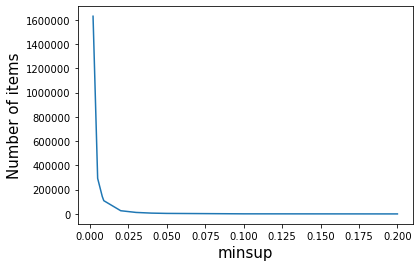

In [7]:
minsup = [0.2, 0.1, 0.05, 0.04, 0.03, 0.02, 0.009, 0.008, 0.005, 0.002]
freq = [151, 854, 4355, 6772, 12349, 26460, 109179, 143707, 292776, 1628654]

plt.plot(minsup, freq)

plt.ticklabel_format(axis="y", style="plain")
plt.xlabel("minsup", size=15)
plt.ylabel("Number of items", size=15)
plt.show()

In [8]:
#Rules
minconf = [40, 50, 60, 70, 80, 90]

for c in minconf:
    rules = apriori(baskets, target="r", supp=2, conf=c, report="ascl")
    print("Confidence:", c)
    print("Number of rules:", len(rules))
    print()

Confidence: 40
Number of rules: 178517

Confidence: 50
Number of rules: 99715

Confidence: 60
Number of rules: 62769

Confidence: 70
Number of rules: 34259

Confidence: 80
Number of rules: 16375

Confidence: 90
Number of rules: 5901



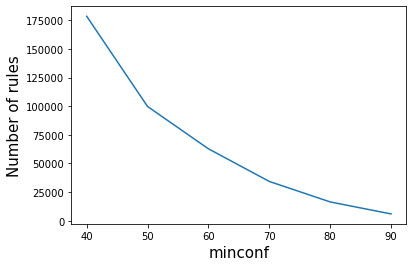

In [9]:
minconf = [40, 50, 60, 70, 80, 90]
n_rules = [178517, 99715, 62769, 34259, 16375, 5901]

plt.plot(minconf, n_rules)

plt.ticklabel_format(axis="y", style="plain")
plt.xlabel("minconf", size=15)
plt.ylabel("Number of rules", size=15)
plt.show()

In [10]:
'''
results = []
conf = [40, 50, 60, 70, 80, 90]

for confidence in conf:
    itemsets = apriori(baskets, supp=2, target='r', conf=confidence, report='scl')
    for item in itemsets: 
        results.append({
            'supp': item[2],
            'conf': item[3],
            'lift': item[4]
        })
        
results[0:5]
'''

"\nresults = []\nconf = [40, 50, 60, 70, 80, 90]\n\nfor confidence in conf:\n    itemsets = apriori(baskets, supp=2, target='r', conf=confidence, report='scl')\n    for item in itemsets: \n        results.append({\n            'supp': item[2],\n            'conf': item[3],\n            'lift': item[4]\n        })\n        \nresults[0:5]\n"

In [30]:
rules = apriori(baskets, supp=2, target='r', conf=68, report='ascl')

confidence = []
lift = []

print('Number of rules:', len(rules))

for r in rules:
    confidence.append(r[4])
    lift.append(r[5])

Number of rules: 38662


In [41]:
rules.sort(key=lambda x: x[4], reverse=True)

count = 0

for r in rules:
    if (r[5] > 2 and r[5]) and (r[4] > 0.68 and r[4]) and (r[3] > 0.02 and r[2]):
        count += 1
        print(r)

('Age:39-60', ('Monthly:8000-20000', 'AtCompany:0-2', 'Research & Development'), 33, 0.022618231665524333, 0.8048780487804879, 2.564011076791991)
('Female', ('Below College', 'Monthly:5000-8000'), 36, 0.02467443454420836, 0.782608695652174, 2.0760474308300396)
('Female', ('Monthly:5000-8000', '10-30 miles', 'AtCompany:2-6', 'Attr:No'), 32, 0.02193283070596299, 0.7804878048780488, 2.070421286031042)
('AtCompany:0-2', ('Monthly:1000-3000', 'TotWork:1-5', 'OverTime:No'), 35, 0.023989033584647018, 0.7777777777777778, 2.754314994606257)
('Age:39-60', ('Hourly:58-72', 'Monthly:8000-20000', 'Research & Development'), 31, 0.021247429746401644, 0.775, 2.4688318777292575)
('Age:39-60', ('Monthly:8000-20000', 'Female', 'Married', 'Research & Development'), 34, 0.023303632625085675, 0.7727272727272727, 2.4615919015482333)
('AtCompany:0-2', ('Attr:Yes', 'TotWork:1-5', 'OverTime:No'), 30, 0.0205620287868403, 0.7692307692307693, 2.724047796863331)
('AtCompany:6-29', ('Monthly:8000-20000', 'TotWork:15

In [32]:
print(count)

57


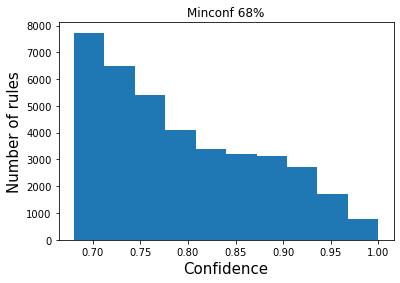

In [33]:
plt.hist(confidence)
plt.title("Minconf 68%")
plt.xlabel("Confidence", size=15)
plt.ylabel("Number of rules", size=15)
plt.show()

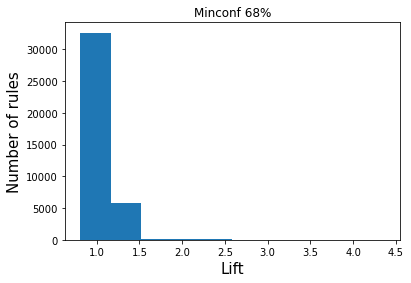

In [35]:
plt.hist(lift)
plt.title("Minconf 68%")
plt.xlabel("Lift", size=15)
plt.ylabel("Number of rules", size=15)
plt.show()

In [16]:
#from mlxtend.frequent_patterns import apriori
#from mlxtend.frequent_patterns import association_rules

In [37]:
rules = apriori(baskets, supp=2, target='r', conf=68, report='ascl')
rules.sort(key=lambda x: x[4], reverse=True)

In [40]:
for r in rules:
    if (r[5] > 2 and r[5]):
        print(r)

('Age:39-60', ('Hourly:58-72', 'Monthly:8000-20000', 'Married'), 28, 0.019191226867717615, 0.9032258064516129, 2.8773066629102693)
('Age:39-60', ('Monthly:8000-20000', 'AtCompany:0-2', 'Research & Development', 'OverTime:No'), 28, 0.019191226867717615, 0.8484848484848485, 2.7029244409157074)
('Female', ('Monthly:5000-8000', '10-30 miles', 'AtCompany:2-6', 'OverTime:No', 'Attr:No'), 27, 0.018505825908156272, 0.8181818181818182, 2.170413223140496)
('Female', ('Below College', 'Monthly:5000-8000', 'OverTime:No'), 26, 0.01782042494859493, 0.8125, 2.155340909090909)
('Age:39-60', ('Monthly:8000-20000', '4-10 miles', 'Bachelor'), 25, 0.017135023989033583, 0.8064516129032258, 2.569023806169883)
('Female', ('Monthly:5000-8000', '10-30 miles', 'AtCompany:2-6', 'OverTime:No'), 29, 0.019876627827278958, 0.8055555555555556, 2.136919191919192)
('Age:39-60', ('Monthly:8000-20000', 'AtCompany:0-2', 'Research & Development'), 33, 0.022618231665524333, 0.8048780487804879, 2.564011076791991)
('Age:39-60

In [19]:
dfpattern["Attrition"].unique()

array(['Attr:Yes', 'Attr:No'], dtype=object)

In [45]:
#Attrition YES con lift>1.8
for r in rules:
    if r[0] == ("Attr:Yes") and r[5] > 1.8:
        print(r)

('Attr:Yes', ('TotWork:1-5', 'OverTime:Yes', 'Single'), 25, 0.017135023989033583, 0.6944444444444444, 4.367217432950191)
('Attr:Yes', ('OverTime:Yes', '10-30 miles', 'Single'), 25, 0.017135023989033583, 0.6944444444444444, 4.367217432950191)


In [44]:
for r in rules:
    if r[0] == ("Attr:No") and r[5] > 1.1:
        print(r)

('Attr:No', ('Below College', 'Married', 'Research & Development', 'OverTime:No'), 36, 0.02467443454420836, 1.0, 1.189079054604727)
('Attr:No', ('Hourly:58-72', 'Master', 'Research & Development', 'OverTime:No'), 34, 0.023303632625085675, 1.0, 1.189079054604727)
('Attr:No', ('Hourly:58-72', 'JobSatisf:Very High', 'Married', 'OverTime:No'), 31, 0.021247429746401644, 1.0, 1.189079054604727)
('Attr:No', ('Hourly:58-72', '4-10 miles', 'Age:32-39', 'Research & Development'), 30, 0.0205620287868403, 1.0, 1.189079054604727)
('Attr:No', ('Hourly:58-72', '0-4 miles', 'Male', 'Research & Development', 'OverTime:No'), 30, 0.0205620287868403, 1.0, 1.189079054604727)
('Attr:No', ('Hourly:58-72', '0-4 miles', 'Research & Development', 'OverTime:No'), 49, 0.033584647018505824, 1.0, 1.189079054604727)
('Attr:No', ('JobSatisf:Medium', 'EnvSatisf:Medium', 'Male', 'OverTime:No'), 30, 0.0205620287868403, 1.0, 1.189079054604727)
('Attr:No', ('JobSatisf:Medium', 'TotWork:15-40', 'Research & Development', 'O

('Attr:No', ('Divorced', 'Age:18-32', 'JobSatisf:Very High'), 30, 0.0205620287868403, 0.9375, 1.1147616136919316)
('Attr:No', ('Divorced', 'JobSatisf:High', '0-4 miles'), 30, 0.0205620287868403, 0.9375, 1.1147616136919316)
('Attr:No', ('Divorced', 'JobSatisf:High', 'Male', 'OverTime:No'), 45, 0.030843043180260453, 0.9375, 1.1147616136919316)
('Attr:No', ('Divorced', 'JobSatisf:Very High', 'Research & Development', 'OverTime:No'), 45, 0.030843043180260453, 0.9375, 1.1147616136919316)
('Attr:No', ('Divorced', 'Female', 'Bachelor', 'Research & Development'), 30, 0.0205620287868403, 0.9375, 1.1147616136919316)
('Attr:No', ('Divorced', 'Bachelor', 'AtCompany:2-6', 'OverTime:No'), 30, 0.0205620287868403, 0.9375, 1.1147616136919316)
('Attr:No', ('TotWork:15-40', 'Master', 'Female'), 45, 0.030843043180260453, 0.9375, 1.1147616136919316)
('Attr:No', ('TotWork:15-40', 'AtCompany:6-29', 'JobSatisf:High', 'Research & Development'), 30, 0.0205620287868403, 0.9375, 1.1147616136919316)
('Attr:No', ('

### PREDIRE LA TARGET VARIABLE

In [22]:
#('Attr:No', ('Below College', 'Married', 'Research & Development', 'OverTime:No'), 36, 0.02467443454420836, 1.0, 1.189079054604727)
dfno = pd.DataFrame(dfpattern.loc[(df['Education'] == 'Below College') & (dfpattern['MaritalStatus'] == 'Married') & (dfpattern['Department'] == 'Research & Development') & (dfpattern['OverTime'] == 'OverTime:No')].values, columns = dfpattern.columns)

#('Attr:Yes', ('TotWork:1-5', 'OverTime:Yes', 'Single'), 25, 0.017135023989033583, 0.6944444444444444, 4.367217432950191)
dfyes = pd.DataFrame(dfpattern.loc[(dfpattern['TotalWorkingYears'] == 'TotWork:1-5') & (dfpattern['OverTime'] == 'OverTime:Yes') & (dfpattern['MaritalStatus'] == 'Single')].values, columns = dfpattern.columns)

 
print('TP: ' + str(len(dfyes.loc[dfyes['Attrition'] == 'Attr:Yes'])))
print('FP: ' + str(len(dfyes.loc[dfyes['Attrition'] == 'Attr:No'])))

print('TN: ' + str(len(dfno.loc[dfno['Attrition'] == 'Attr:No'])))
print('FN: ' + str(len(dfno.loc[dfno['Attrition'] == 'Attr:Yes'])))
print('')


sumtrue2 = (len(dfyes.loc[dfyes['Attrition'] == 'Attr:Yes'])) + (len(dfno.loc[dfno['Attrition'] == 'Attr:No']))
sumfalse2 = (len(dfyes.loc[dfyes['Attrition'] == 'Attr:No'])) + (len(dfno.loc[dfno['Attrition'] == 'Attr:Yes']))
accuracy2 = sumtrue2/(sumtrue2 + sumfalse2)
print('Accuracy: ' + str(accuracy2))

TP: 25
FP: 11
TN: 36
FN: 0

Accuracy: 0.8472222222222222


### MISSING VALUES 

In [23]:
dfpattern["OverTime"].unique()

array(['OverTime:Yes', 'OverTime:No'], dtype=object)

In [24]:
#OverTime YES con lift>2
for r in rules:
    if r[0] == ("OverTime:Yes") and r[5] > 2:
        print(r)

('OverTime:Yes', ('Attr:Yes', 'EnvSatisf:Very High', 'Single'), 23, 0.015764222069910898, 0.7666666666666667, 2.7083938660209848)
('OverTime:Yes', ('Attr:Yes', 'TotWork:1-5', 'AtCompany:2-6'), 24, 0.01644962302947224, 0.7272727272727273, 2.5692273827867047)
('OverTime:Yes', ('Attr:Yes', 'Hourly:44-58', 'Research & Development'), 20, 0.013708019191226868, 0.6666666666666666, 2.355125100887813)
('OverTime:Yes', ('Attr:Yes', 'Female', 'AtCompany:2-6'), 20, 0.013708019191226868, 0.6666666666666666, 2.355125100887813)
('OverTime:Yes', ('Attr:Yes', 'Female', 'Research & Development'), 35, 0.023989033584647018, 0.6481481481481481, 2.2897049591964844)
('OverTime:Yes', ('Attr:Yes', 'JobSatisf:High', 'TotWork:5-15'), 22, 0.015078821110349555, 0.6470588235294118, 2.285856715567583)
('OverTime:Yes', ('Attr:Yes', '10-30 miles', 'Female'), 22, 0.015078821110349555, 0.6470588235294118, 2.285856715567583)
('OverTime:Yes', ('Attr:Yes', 'EnvSatisf:Very High', 'Research & Development'), 22, 0.01507882111

In [25]:
#OverTime NO con lift>1
for r in rules:
    if r[0] == ("OverTime:No") and r[5] > 1.2:
        print(r)

('OverTime:No', ('EnvSatisf:Low', 'Hourly:44-58', 'Attr:No'), 38, 0.02604523646333105, 0.9743589743589743, 1.3590724126096976)
('OverTime:No', ('EnvSatisf:Low', 'TotWork:1-5', 'Attr:No'), 37, 0.025359835503769704, 0.9736842105263158, 1.358131226728389)
('OverTime:No', ('Monthly:1000-3000', 'AtCompany:0-2', 'TotWork:5-15', 'Research & Development', 'Attr:No'), 37, 0.025359835503769704, 0.9736842105263158, 1.358131226728389)
('OverTime:No', ('Monthly:1000-3000', 'Age:39-60', 'Male', 'Attr:No'), 31, 0.021247429746401644, 0.96875, 1.3512488049713194)
('OverTime:No', ('EnvSatisf:Low', 'TotWork:1-5', 'Research & Development', 'Attr:No'), 30, 0.0205620287868403, 0.967741935483871, 1.3498427188058966)
('OverTime:No', ('EnvSatisf:Low', 'JobSatisf:High', 'Male', 'Research & Development', 'Attr:No'), 30, 0.0205620287868403, 0.967741935483871, 1.3498427188058966)
('OverTime:No', ('AtCompany:0-2', 'Age:39-60', 'TotWork:5-15', 'Attr:No'), 29, 0.019876627827278958, 0.9666666666666667, 1.3483428935627

In [74]:
dfmissing = dfpattern
dfmissing["Predicted"] = dfmissing["OverTime"]

In [75]:
import random
random.seed(1)

numbers = range(0,len(dfmissing))
rand = random.sample(numbers, 70)

for i in rand:
    dfmissing["Predicted"].iloc[i] = "NaN"
    
dfmissing["Predicted"].value_counts()

OverTime:No     998
OverTime:Yes    391
NaN              70
Name: Predicted, dtype: int64

In [76]:
#('OverTime:Yes', ('Attr:Yes', 'EnvSatisf:Very High', 'Single'), 23, 0.015764222069910898, 0.7666666666666667, 2.7083938660209848)
dot_yes = pd.DataFrame(dfmissing.loc[(dfmissing['Attrition'] == 'Attr:Yes') & (dfmissing['EnvironmentSatisfaction'] == 'EnvSatisf:Very High') & (dfmissing['MaritalStatus'] == 'Single')].values,columns = dfmissing.columns)
#('OverTime:No', ('EnvSatisf:Low', 'Hourly:44-58', 'Attr:No'), 38, 0.02604523646333105, 0.9743589743589743, 1.3590724126096976)
dot_no= pd.DataFrame(dfmissing.loc[(dfmissing['EnvironmentSatisfaction'] == 'EnvSatisf:Low') & (dfmissing['HourlyRate'] == 'Hourly:44-58') & (dfmissing['Attrition'] == 'Attr:No')].values,columns = dfmissing.columns)

 

print('OverTime:Yes')
print('TP: ' + str(len(dot_yes.loc[dot_yes['OverTime'] == 'OverTime:Yes'])))
print('FP: ' + str(len(dot_yes.loc[dot_yes['OverTime'] == 'OverTime:No'])))
print('TN: ' + str(len(dot_no.loc[dot_no['OverTime'] == 'OverTime:No'])))
print('FN: ' + str(len(dot_no.loc[dot_no['OverTime'] == 'OverTime:Yes'])))
print('')
print('OverTime:No')
print('TP: ' + str(len(dot_no.loc[dot_no['OverTime'] == 'OverTime:No'])))
print('FP: ' + str(len(dot_no.loc[dot_no['OverTime'] == 'OverTime:Yes'])))
print('TN: ' + str(len(dot_yes.loc[dot_yes['OverTime'] == 'OverTime:Yes'])))
print('FN: ' + str(len(dot_yes.loc[dot_yes['OverTime'] == 'OverTime:No'])))
print('')

 

sumtrue = ((len(dot_yes.loc[dot_yes['OverTime'] == 'OverTime:Yes']))+(len(dot_no.loc[dot_no['OverTime'] == 'OverTime:No']))+(len(dot_no.loc[dot_no['OverTime'] == 'OverTime:No']))+(len(dot_yes.loc[dot_yes['OverTime'] == 'OverTime:Yes'])))
sumfalse = ((len(dot_yes.loc[dot_yes['OverTime'] == 'OverTime:No']))+(len(dot_no.loc[dot_no['OverTime'] == 'OverTime:Yes']))+(len(dot_no.loc[dot_no['OverTime'] == 'OverTime:Yes']))+(len(dot_yes.loc[dot_yes['OverTime'] == 'OverTime:No'])))                                                                      
accuracy = sumtrue/(sumtrue+sumfalse)

 

print('Accuracy: ' + str(accuracy))

OverTime:Yes
TP: 23
FP: 7
TN: 38
FN: 1

OverTime:No
TP: 38
FP: 1
TN: 23
FN: 7

Accuracy: 0.8840579710144928


In [77]:
dfmissing.Predicted.value_counts()

OverTime:No     998
OverTime:Yes    391
NaN              70
Name: Predicted, dtype: int64

In [78]:
dfmissing.loc[(dfmissing['Attrition'] == 'Attr:Yes') & (dfmissing['EnvironmentSatisfaction'] == 'EnvSatisf:Very High') & (dfmissing['MaritalStatus'] == 'Single') & (dfmissing['Predicted']=='NaN'), "Predicted"] = "OverTime:Yes"
dfmissing.loc[(dfmissing['EnvironmentSatisfaction'] == 'EnvSatisf:Low') & (dfmissing['HourlyRate'] == 'Hourly:44-58') & (dfmissing['Attrition'] == 'Attr:No') & (dfmissing['Predicted']=='NaN'), "Predicted"] = "OverTime:No"
dfmissing.Predicted.value_counts()

OverTime:No     1000
OverTime:Yes     394
NaN               65
Name: Predicted, dtype: int64